In [1]:
import DSGRN
from HysteresisPaths import *
import csv

Define a network and the input and output signal genes. The input gene is where the parameter factor graph paths are computed and the output gene is where we read the output (which determines if the FP is low or high).

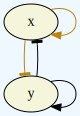

In [2]:
net_spec = 'x : x ~y\n y : ~x y'

S_gene = 'x' # Input signal gene
P_gene = 'y' # Output sugnal gene

network = DSGRN.Network(net_spec)

DSGRN.DrawGraph(network)

Make the parameter graph and get the number of nodes in the parameter graph as well as the number of nodes in the input gene factor graph and the number of reduced parameters (number of nodes in all other factor graphs).

In [3]:
parameter_graph = DSGRN.ParameterGraph(network)

S_index = network.index(S_gene)

# Number of parameter nodes
num_full_params = parameter_graph.size()
# Number of S_gene factor graph parameter nodes
num_factor_params = len(parameter_graph.factorgraph(S_index))
# Number of reduced parameter indices
num_reduce_params = num_full_params // num_factor_params

print('Total number of parameters:', num_full_params)
print('Number of parameters in S_gene factor graph:', num_factor_params)
print('Number of reduced parameters:', num_reduce_params)

Total number of parameters: 1600
Number of parameters in S_gene factor graph: 20
Number of reduced parameters: 80


Find which reduced parameter indices produce hysteresis

In [4]:
hyst_found = False

for rpi in range(num_reduce_params):
    # Compute hysteretic paths
    num_paths, hyst_paths = compute_hysteresis_paths(network, S_gene, P_gene, rpi)

    num_hyst_paths = len(hyst_paths)

    if num_hyst_paths > 0:
        hyst_found = True
        print('Reduced parameter index', rpi, 'produces ascending hysteresis.')

if not hyst_found:
    print('No ascending hysteresis found!')

No ascending hysteresis found!


No ascending hysteresis (starting at a low FP and ending at a high FP) found for this network. Let's try to find descending hysteresis (starting at a high FP and ending at a low FP).

In [5]:
hyst_found = False

for rpi in range(num_reduce_params):
    # Compute hysteretic paths
    num_paths, hyst_paths = compute_hysteresis_paths(network, S_gene, P_gene, rpi, hyst_type='descending')

    num_hyst_paths = len(hyst_paths)

    if num_hyst_paths > 0:
        hyst_found = True
        print('Reduced parameter index', rpi, 'produces descending hysteresis.')

if not hyst_found:
    print('No descending hysteresis found!')

Reduced parameter index 2 produces descending hysteresis.
Reduced parameter index 4 produces descending hysteresis.
Reduced parameter index 8 produces descending hysteresis.
Reduced parameter index 12 produces descending hysteresis.
Reduced parameter index 22 produces descending hysteresis.
Reduced parameter index 24 produces descending hysteresis.
Reduced parameter index 28 produces descending hysteresis.
Reduced parameter index 32 produces descending hysteresis.
Reduced parameter index 47 produces descending hysteresis.
Reduced parameter index 48 produces descending hysteresis.
Reduced parameter index 67 produces descending hysteresis.
Reduced parameter index 68 produces descending hysteresis.


Pick one of the reduced parameter indices above and compute all hysteretic paths for this reduced parameter index.

In [6]:
# Pick a reduced parameter index
rpi = 12

# Compute hysteretic paths
num_paths, hyst_paths = compute_hysteresis_paths(network, S_gene, P_gene, rpi, hyst_type='descending')

num_hyst_paths = len(hyst_paths)

print('Reduced parameter index:', rpi)
print('Total number of paths:', num_paths)
print('Number of hysteretic paths:', num_hyst_paths)

Reduced parameter index: 12
Total number of paths: 690
Number of hysteretic paths: 133


Save hysteretic paths to a file.

In [7]:
hyst_paths_fname = 'hysteresis_paths_2_nodes.csv'

with open(hyst_paths_fname, mode='w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    for path in hyst_paths:
        csv_writer.writerow(path)